In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
training_set = pd.read_csv('Wordle.csv')
# print(training_set)
X = training_set.iloc[:,2:3].values
# X

In [12]:
# Define an alphabet
alphabet = "abcdefghijklmnopqrstuvwxyz"

# Vectorize a letter
def letter_to_vector(letter):
    vector = np.zeros(26)
    index = alphabet.index(letter)
    vector[index] = 1
    return vector

# Tensorize a word
def word_to_tensor(word):
    vectors = []
    for letter in word:
        vectors.append(letter_to_vector(letter))
    return np.array(vectors)


# Vectorize a word
def word_to_vector(word):
    vectors = []
    for letter in word:
        vectors.append(letter_to_vector(letter))
    return np.concatenate(vectors)


In [13]:
word_vec=[[ ],[ ],[ ],[ ]]
for i in range(len(X)):
    word=X[i][0]
    # Vectorize the words
    tensor = word_to_tensor(word)
    vector = word_to_vector(word)
    word_vec[0].append(word)
    word_vec[1].append(tensor)
    word_vec[2].append(vector)
word_vec

[['slump',
  'crank',
  'gorge',
  'query',
  'drink',
  'favor',
  'abbey',
  'tangy',
  'panic',
  'solar',
  'shire',
  'proxy',
  'point',
  'robot',
  'prick',
  'wince',
  'crimp',
  'knoll',
  'sugar',
  'whack',
  'mount',
  'perky',
  'could',
  'wrung',
  'light',
  'those',
  'moist',
  'shard',
  'pleat',
  'aloft',
  'skill',
  'elder',
  'frame',
  'humor',
  'pause',
  'ulcer',
  'ultra',
  'robin',
  'cynic',
  'aroma',
  'caulk',
  'shake',
  'dodge',
  'swill',
  'tacit',
  'other',
  'thorn',
  'trove',
  'bloke',
  'vivid',
  'spill',
  'chant',
  'choke',
  'rupee',
  'nasty',
  'mourn',
  'ahead',
  'brine',
  'cloth',
  'hoard',
  'sweet',
  'month',
  'lapse',
  'watch',
  'today',
  'focus',
  'smelt',
  'tease',
  'cater',
  'movie',
  'saute',
  'allow',
  'renew',
  'their',
  'slosh',
  'purge',
  'chest',
  'depot',
  'epoxy',
  'nymph',
  'found',
  'shall',
  'stove',
  'lowly',
  'snout',
  'trope',
  'fewer',
  'shawl',
  'natal',
  'comma',
  'foray',

In [14]:
# Calculate the Euclid distance of words
with open('points.csv','w+') as f:
    for i in range(len(word_vec[0])):
        for j in range(len(word_vec[0])):
            dist = np.linalg.norm(word_vec[1][i] - word_vec[1][j])
            print(word_vec[0][i],',',word_vec[0][j],',', dist,file=f)

E:\anaconda3\envs\pytorch1-13-1py3-7\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\anaconda3\envs\pytorch1-13-1py3-7\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


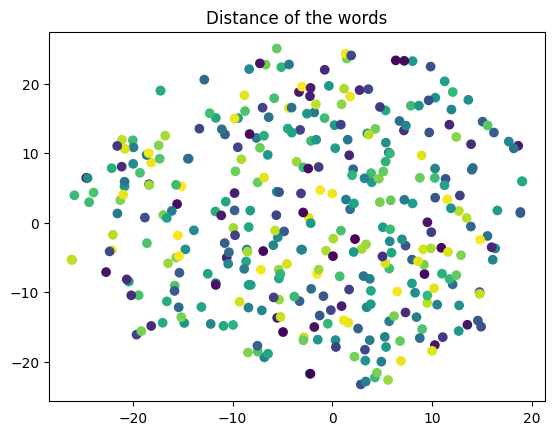

[[-3.28242970e+00 -1.12702065e+01]
 [ 1.27221794e+01 -1.18752651e+01]
 [ 2.09519053e+00  7.68127775e+00]
 [ 1.77053394e+01  1.16589088e+01]
 [ 1.20736942e+01 -8.85191727e+00]
 [-6.67805052e+00  2.27089233e+01]
 [-1.51214380e+01  5.22759533e+00]
 [-3.33941364e+00  1.87771626e+01]
 [ 1.45415401e+00  2.35857620e+01]
 [-2.04055176e+01 -8.44604778e+00]
 [ 3.44290948e+00 -1.21460648e+01]
 [-2.34938121e+00  7.24151254e-01]
 [ 1.27970514e+01  3.90750813e+00]
 [ 1.39953737e+01  7.61196899e+00]
 [ 9.24688721e+00 -7.37166023e+00]
 [ 5.66010571e+00  1.00874243e+01]
 [ 1.47765980e+01 -9.96720982e+00]
 [-5.46885347e+00 -2.09129715e+00]
 [-1.94206047e+01 -1.04220009e+01]
 [ 5.70434523e+00 -1.41562452e+01]
 [ 1.02853203e+01  6.43214130e+00]
 [ 1.17458496e+01  1.40840473e+01]
 [-6.47362852e+00  9.74658966e+00]
 [ 1.05215664e+01 -1.17739944e+01]
 [-2.61011868e+01 -5.33455896e+00]
 [ 4.92003393e+00 -1.99544621e+01]
 [ 1.15347404e+01  3.36511254e+00]
 [ 3.24683219e-01 -1.68635082e+01]
 [-1.24887352e+01 -7

In [20]:
#Visualize the distance of words
from sklearn.manifold import TSNE
tsneData = TSNE().fit_transform(word_vec[2])
ax = plt.subplot(aspect='auto')
colors=np.random.rand(len(word_vec[2]))
sc = ax.scatter(tsneData[:,0], tsneData[:,1],c=colors)
plt.title("Distance of the words")
plt.show()
print(tsneData)

In [16]:
from sklearn.cluster import KMeans
n_clusters=1
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(word_vec[2])
centroid=cluster.cluster_centers_
dist_min = np.linalg.norm(word_vec[2][0] - centroid)
dist_min_word = [word_vec[0][0]]
for i in range(len(word_vec[0])):
    dist = np.linalg.norm(word_vec[2][i] - centroid)
    if(dist<dist_min):
        dist_min = dist
        dist_min_word = word_vec[0][i]
    elif(dist==dist_min):
        dist_min_word.append(word_vec[0][i])
    print('The best bigin guess: ',dist_min_word)
    

The best bigin guess:  ['slump', 'slump']
The best bigin guess:  crank
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  gorge
The best bigin guess:  solar
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
The best bigin guess:  shire
T

In [17]:
n_clusters=5
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(word_vec[2])
centroid=cluster.cluster_centers_
y_pred = cluster.labels_
# Label the words with Euclid distance
words=[]
Y=[1,2,3,4,5,6,7]
centtrod = cluster.cluster_centers_
color=['blue','orange','green','purple','brown','pink','gray','olive','cyan']
# for i in range(n_clusters):